## Step 1: Importing all the important libraries
### 1. Pandas: Used for data manipulation.
### 2. Numpy: Used for working with 1-D and 2-D arrays
### 3. Seaborn: Used for presenting data and relations in a graphical manner
### 4. Matplotlib: Used for creating static and interactional plots and charts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Checking out our dataset

In [2]:
train_dataset = pd.read_csv('titanic_train.csv')

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2. Data cleaning and preprocessing:

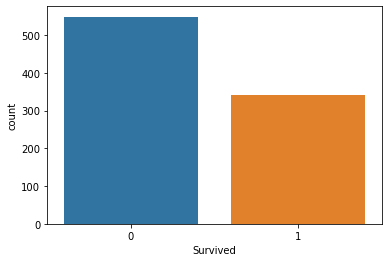

In [4]:
sns.countplot(x='Survived', data=train_dataset)

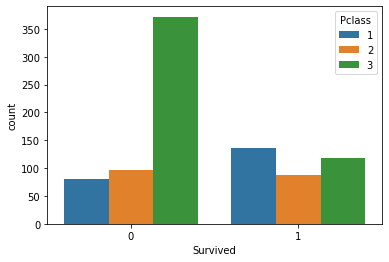

In [5]:
sns.countplot(x='Survived', data=train_dataset, hue='Pclass')

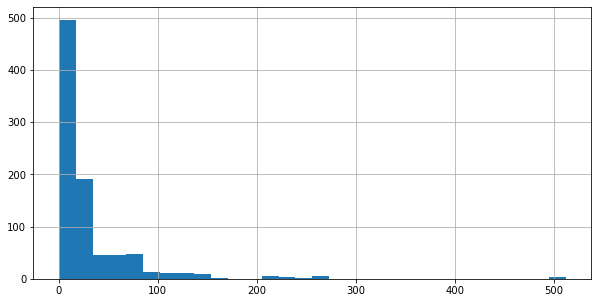

In [6]:
train_dataset['Fare'].hist(bins=30, figsize=(10, 5))

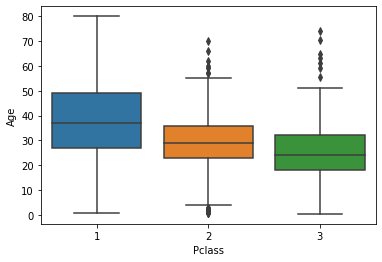

In [7]:
## To find the average age of each class
sns.boxplot(x='Pclass', y='Age', data=train_dataset)

In [8]:
##We can also find the mean ages with the groupby method
mean_age = train_dataset['Age'].groupby(train_dataset['Pclass']).mean()

In [9]:
mean_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### Cleaning the data out of its null/missing values

In [10]:
##Creating a function to fill the missing values in the age feature of the dataset
def filling_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [11]:
train_dataset['Age'] = train_dataset[['Age', 'Pclass']].apply(filling_age, axis=1)

In [12]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

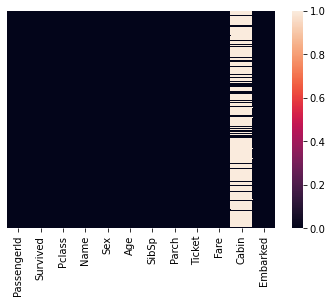

In [13]:
##In graphical format
sns.heatmap(train_dataset.isnull(), yticklabels=False)

In [14]:
##Since the total amount of missing values is pretty high in 'Cabin' column, it is better to simply drop the feature
train_dataset.drop('Cabin', axis=1, inplace=True)

In [15]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
##Now we perform one-hot encoding on our categorical features
sex = pd.get_dummies(train_dataset['Sex'], drop_first=True)

embarked = pd.get_dummies(train_dataset['Embarked'], drop_first=True)

In [17]:
train_dataset = pd.concat([train_dataset, sex, embarked], axis=1)

In [18]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [19]:
train_dataset.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [20]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [21]:
##Since Name and Ticket will not be useful for predictions, we will simply drop them
train_dataset.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [22]:
train_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
train_dataset.drop(['PassengerId'], axis=1, inplace=True)

In [24]:
train_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Step 3. Segregating our dataset into X and y, where:
            X = Every feature except our target feature(in this case, its 'Survived')
            y = Our target feature('Survived')

In [25]:
X = train_dataset.drop('Survived', axis=1)
y = train_dataset['Survived']

In [26]:
from sklearn.model_selection import train_test_split

### Train_test_split will help us to distribute our data into training and testing datasets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Importing Logistic Regression from sklearn.linear_model

In [28]:
from sklearn.linear_model import LogisticRegression

### Initializing our model

In [29]:
log_reg = LogisticRegression()

### Fitting our training datasets

In [30]:
log_reg.fit(X_train, y_train)

/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
predicitions_logistic = log_reg.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

## Precision, Recall, f1-score, and Support

### 1. Precision: Precision expresses the proportion of the data points our model says was relevant actually were revelant

### 2. Recall: Ability of a model to find all the relevant cases within a dataset

### 3. f1-Score: Harmonic mean of recall and precision and recall is known as f1-Score.

### 4, Support: Support is the number of actual occurrences of the class in the specified dataset.

In [33]:
print(classification_report(y_test, predicitions_logistic))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       175
           1       0.81      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



### Our test dataset: from which we will try to predict the people who survived

In [34]:
test = pd.read_csv('titanic_test-.csv')

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
## Applying feature engineering on the test dataset

#1. Converting null values in the Age column to real values
test['Age'] = test[['Age', 'Pclass']].apply(filling_age, axis=1)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

#2. Performing oneHot encoding on our categorical features
sex = pd.get_dummies(test['Sex'], drop_first=True)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)

#3.Concatenating the different DataFrames
test = pd.concat([test, sex, embarked], axis=1)

#4. Dropping the unwanted features
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [38]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [39]:
log_reg.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
test1 = pd.read_csv('titanic_test-.csv')

In [41]:
passengerID = test1['PassengerId']

In [43]:
final = pd.DataFrame(passengerID, log_reg.predict(test))

In [68]:
final.to_csv('draft1.csv')

In [44]:
final

,PassengerId
0,892
0,892
0,892
0,892
1,893
...,...
0,892
1,893
0,892
0,892


In [46]:
Survived = log_reg.predict(test)

In [93]:
column = ['PassengerId', 'Survived']

In [94]:
final = pd.DataFrame()

In [96]:
pd.DataFrame(passengerID, Survived)

,PassengerId
0,892
0,892
0,892
0,892
1,893
...,...
0,892
1,893
0,892
0,892


In [97]:
type(passengerID)

pandas.core.series.Series

In [98]:
type(Survived)

numpy.ndarray

In [99]:
survived_series = pd.Series(Survived)

In [103]:
type(survived_series)

pandas.core.series.Series

In [49]:
result = pd.DataFrame({'PassengerId' : passengerID,
                       'Survived' : Survived}, index=None)

In [50]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
result.reset_index(drop=True, inplace=True)

In [55]:
result.to_csv('third_draft.csv', index=False)